In [19]:
%matplotlib inline
# not sure if necessary

In [20]:
import finetune
import importlib
import torch

In [21]:
# run this cell when you change stuff in the finetune module, and don't want to restart the notebook's kernel.
importlib.reload(finetune)
finetune.structure_checkpoints() # If this prints 'Cannot safely create ...', it means that the folder probably already exists

cannot safely create ../../data\finetuned_models
cannot safely create ../../data\finetuned_models\StanfordCars
cannot safely create ../../data\finetuned_models\StanfordCars\resnet
cannot safely create ../../data\finetuned_models\StanfordCars\alexnet
cannot safely create ../../data\finetuned_models\StanfordCars\vgg
cannot safely create ../../data\finetuned_models\StanfordCars\squeezenet
cannot safely create ../../data\finetuned_models\StanfordCars\densenet
cannot safely create ../../data\finetuned_models\StanfordCars\inception
cannot safely create ../../data\finetuned_models\FGVC-Aircraft
cannot safely create ../../data\finetuned_models\FGVC-Aircraft\resnet
cannot safely create ../../data\finetuned_models\FGVC-Aircraft\alexnet
cannot safely create ../../data\finetuned_models\FGVC-Aircraft\vgg
cannot safely create ../../data\finetuned_models\FGVC-Aircraft\squeezenet
cannot safely create ../../data\finetuned_models\FGVC-Aircraft\densenet
cannot safely create ../../data\finetuned_models\FG

In [ ]:
models = ['resnet', 'alexnet', 'densenet', 'squeezenet', 'vgg']

for name in models:
    print('[TRAINING]:', name)
    finetune.CLASSIFIER_NAME = name
    finetune.NUM_EPOCHS = 30
    finetune.FEATURE_EXTRACT = False
    finetune.DATASET = 'StanfordCars' # [StanfordCars, FGVC-Aircraft]
    finetune.print_hypers() # shows params

    # Initialize the model for this run
    model_ft = finetune.initialize_model(_verbose=False)


    model, hist, state = finetune.finetune_model(model_ft, 'adam', checkpoint_save=10)


    model_save_path = finetune.format_model_path(finetune.CLASSIFIER_NAME,
                                                 finetune.DATASET,
                                                 state['epochs'])

    finetune.save_model(state, model_save_path)


In [34]:
# # Loading certain model
# model_props = {
#     'name': 'resnet',
#     'dataset': 'StanfordCars',
#     'epochs': 2
# }
# model_load_path = finetune.format_model_path(model_props['name'],
#                                              model_props['dataset'],
#                                              3)
# ,
# state = torch.load(model_load_path)
# new_model = finetune.get_model_architecture(model_props['name'])
# new_model.load_state_dict(state['model_state_dict'])
# optimizer_state_dict = state['optimizer_state_dict']

In [4]:
# importlib.reload(finetune)

<module 'finetune' from 'C:\\Users\\dylan\\PycharmProjects\\REDI-utwente\\src\\awesome_GNN\\finetune.py'>

In [13]:
model_save_path = finetune.format_model_path(finetune.CLASSIFIER_NAME,
                                             finetune.DATASET,
                                             state['epochs'])

finetune.save_model(state, model_save_path)

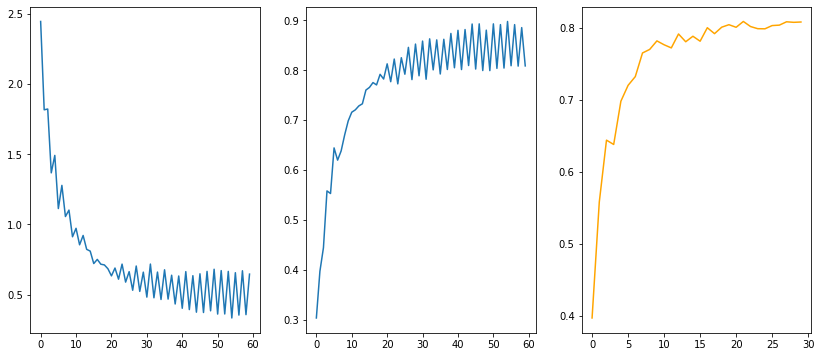

In [15]:
checkpoint = finetune.load_checkpoint(model_save_path)

train_acc_history, train_loss_history, val_acc_history = finetune.get_information_from_checkpoint(checkpoint, plot=True)

In [18]:
optimizer_state_dict = checkpoint['optimizer_state_dict']
finetune.NUM_EPOCHS = 10
checkpoint_model = finetune.get_model_architecture('resnet')
checkpoint_model.load_state_dict(checkpoint['model_state_dict'])

model, hist, state = finetune.finetune_model(checkpoint_model,
                                             'adam',
                                             optimizer_state_dict=optimizer_state_dict,
                                             checkpoint_save=5,
                                             is_retrain=True)


  0%|          | 0/417 [00:00<?, ?it/s]

Epoch 0/9
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 0.3981 Acc: 0.8836


  0%|          | 0/417 [00:00<?, ?it/s]

val Loss: 0.6844 Acc: 0.7928

Epoch 1/9
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 0.3721 Acc: 0.8965


  0%|          | 0/417 [00:00<?, ?it/s]

val Loss: 0.6871 Acc: 0.8032

Epoch 2/9
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 0.3723 Acc: 0.8893


  0%|          | 0/417 [00:00<?, ?it/s]

val Loss: 0.7121 Acc: 0.7969

Epoch 3/9
----------


  0%|          | 0/834 [00:00<?, ?it/s]

train Loss: 0.3502 Acc: 0.8935


  6%|▋         | 54/834 [00:03<00:54, 14.39it/s]


KeyboardInterrupt: 

In [17]:
model_save_path = finetune.format_model_path(finetune.CLASSIFIER_NAME,
                                             finetune.DATASET,
                                             state['epochs'])
finetune.save_model(state, model_save_path)

[CHECKPOINT] ../../data\finetuned_models\FGVC-Aircraft\resnet\resnet_FGVC-Aircraft_E30.pth
